# **PROJECT NAME : Airline Referral capstone project-Classification**

##**Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.**

##**Data descriptions:**


*   **airline**: Name of the airline.

*   **overall**: Overall point is given to the trip between 1 to 10.


*   **author**: Author of the trip


*   **reviewdate**: Date of the Review customer review: Review of the customers in free text format



*  **aircraft**: Type of the aircraft

*   **travellertype**: Type of traveler (e.g. business, leisure)


*   **cabin**: Cabin at the flight date flown: Flight date

*  **seatcomfort**: Rated between 1-5


*   **cabin service**: Rated between 1-5

*   **foodbev**: Rated between 1-5 entertainment: Rated between 1-5


*   **groundservice**: Rated between 1-5

*   **valueformoney**: Rated between 1-5


# **Exploratory Data Analysis**


What is Exploratory Data Analysis (EDA) ?

EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like: – main features of data – variables and relationships that hold between them – identifying which variables are important for our problem We shall look at various exploratory data analysis methods like:

Descriptive Statistics, which is a way of giving a brief overview of the dataset we are dealing with, including some measures and features of the sample Grouping data [Basic grouping with group by]

ANOVA, Analysis Of Variance, which is a computational method to divide variations in an observations set into different components.

Correlation and correlation methods

**TYPES OF EXPLORATORY DATA ANALYSIS**:



*   Univariate (Graphical & Non-graphical)
*   Multivariate (Graphical & Non-graphical)

As there are many aspects of Exploratory Data Analysis, we first tried to sort the task in chronological order.


*   **Understanding the problem statement:** This is the most important part of any analysis as we must understand the needs of customer for which they require analysis on and work  as per their requirements.
*   **Know your Data:** Dealing with a huge data set is a time connsuming part. To minimize the workload and efforts we must have to distribute data and  analyze the contents first.


*   **Handling missing values** : Removing the unnecessary part while handling missing values and data cleaning.



*   **Univariate Analysis (Graphical & Non-graphical)** :  We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
*   **Multivariate Analysis (Graphical & Non-graphical)**:  We'll try to understand how the dependent variables and independent variables relate.



*   **Observations**: For each analysis an observation plays an important role as we must explain, to the customer, what are the observations we are getting from the visualization part, which is important  from the apects of customer.
*   **Conclusion**: Conclusions drive you to summarize the key supporting ideas you  discussed throughout the work, and offer your final impression on the central idea.

# **PROJECT TYPE : INDIVIDUAL**

# **NAME : UDAY KUMAR V**

# **IMPORTING ALL THE NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  xgboost as xgb
from datetime import datetime as dt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


IMPORTING ALL THE NECESSARY METRICES

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
df = pd.read_excel("/content/data_airline_reviews.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '/content/data_airline_reviews.xlsx'

In [ ]:
airline_data = df.copy()

In [ ]:
airline_data.head(10)

In [ ]:
airline_data.tail(10)

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
airline_data.info()

In [ ]:
airline_data.duplicated().sum()

70711

In [ ]:
airline_data.drop_duplicates(inplace = True)

In [ ]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61184 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(7), o

In [ ]:
airline_data.dropna(how = "all", inplace = True)

In [ ]:
airline_data

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
airline_data.isnull().sum()

,0
airline,0
overall,1782
author,0
review_date,0
customer_review,0
aircraft,42695
traveller_type,23643
cabin,2478
route,23670
date_flown,23749


In [ ]:
airline_data.isnull().sum()/len(airline_data)

,0
airline,0.000000
overall,0.029126
author,0.000000
review_date,0.000000
customer_review,0.000000
aircraft,0.697825
traveller_type,0.386431
cabin,0.040501
route,0.386872
date_flown,0.388163


# **UNIVARIATIVE ANALYSIS**

# **1. Types of classes in cabin**

In [ ]:
cabin = airline_data['cabin'].unique()
print(cabin)

['Economy Class' 'Business Class' nan 'Premium Economy' 'First Class']


<Axes: ylabel='count'>

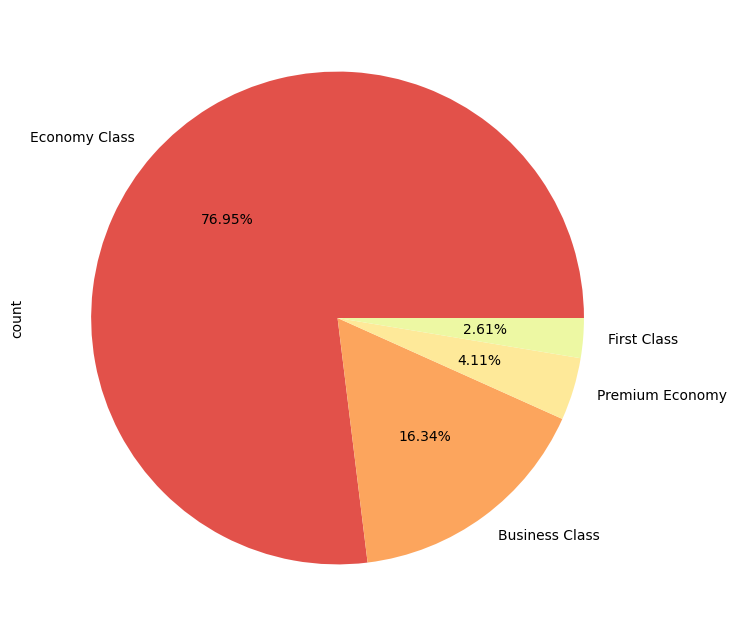

In [ ]:
sns.set_palette('Spectral')
airline_data['cabin'].value_counts().plot(kind = 'pie', autopct = '%1.02f%%', figsize = (10,8))

Economy class has highest passengers compared to other cabins and First class has the least passengers due to its high price.

# **2. Total travellers Count**

In [ ]:
types = airline_data['traveller_type'].value_counts()

In [ ]:
types

,count
traveller_type,
Solo Leisure,13935
Couple Leisure,9699
Family Leisure,7142
Business,6764


Count of cabin in

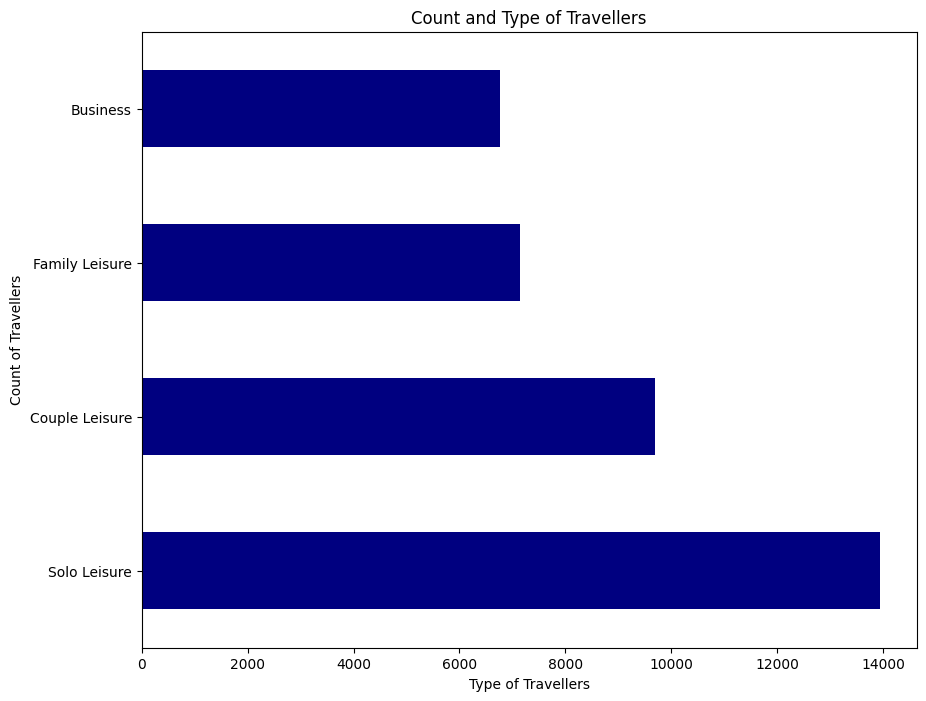

In [ ]:
plt.figure(figsize = (10,8))
airline_data['traveller_type'].value_counts().plot(kind = 'barh', color = 'navy')
plt.title("Count and Type of Travellers")
plt.xlabel("Type of Travellers")
plt.ylabel("Count of Travellers")
plt.show()

It is evident that there are four types of travellers out of which the most frequent traveller type is Solo Leisure followed by couple and family leisure.it is also evident that only a small percentage of people prefer business.

# **3.How often they recommend?**

In [ ]:
recommendation = airline_data['recommended'].value_counts()
recommendation

,count
recommended,
no,31268
yes,28493


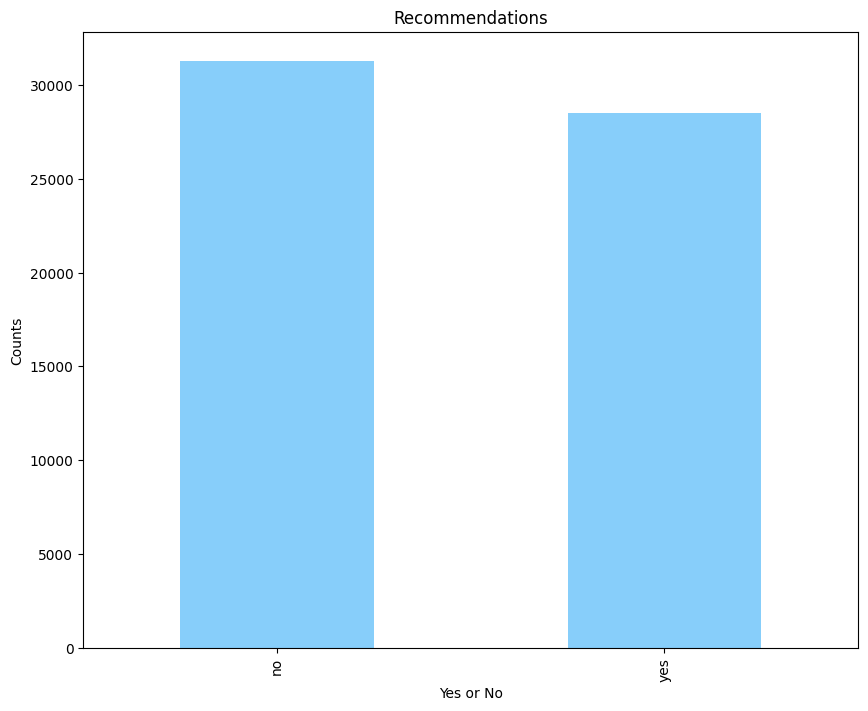

In [ ]:
plt.figure(figsize = (10,8))
airline_data['recommended'].value_counts().plot(kind = 'bar', color = 'lightskyblue')
plt.title("Recommendations")
plt.xlabel("Yes or No")
plt.ylabel("Counts")
plt.show()

Majority of the passengers have given no recommendation

# **4. Most Frequently used and Rarely used airlines.**

In [ ]:
airline_type = airline_data['airline'].value_counts()[0:26]
airline_type

,count
airline,
Spirit Airlines,2871
American Airlines,2846
United Airlines,2774
British Airways,2731
Emirates,1763
China Southern Airlines,1719
Frontier Airlines,1622
Ryanair,1550
Delta Air Lines,1535


In [ ]:
airline_type

,count
airline,
Spirit Airlines,2871
American Airlines,2846
United Airlines,2774
British Airways,2731
Emirates,1763
China Southern Airlines,1719
Frontier Airlines,1622
Ryanair,1550
Delta Air Lines,1535


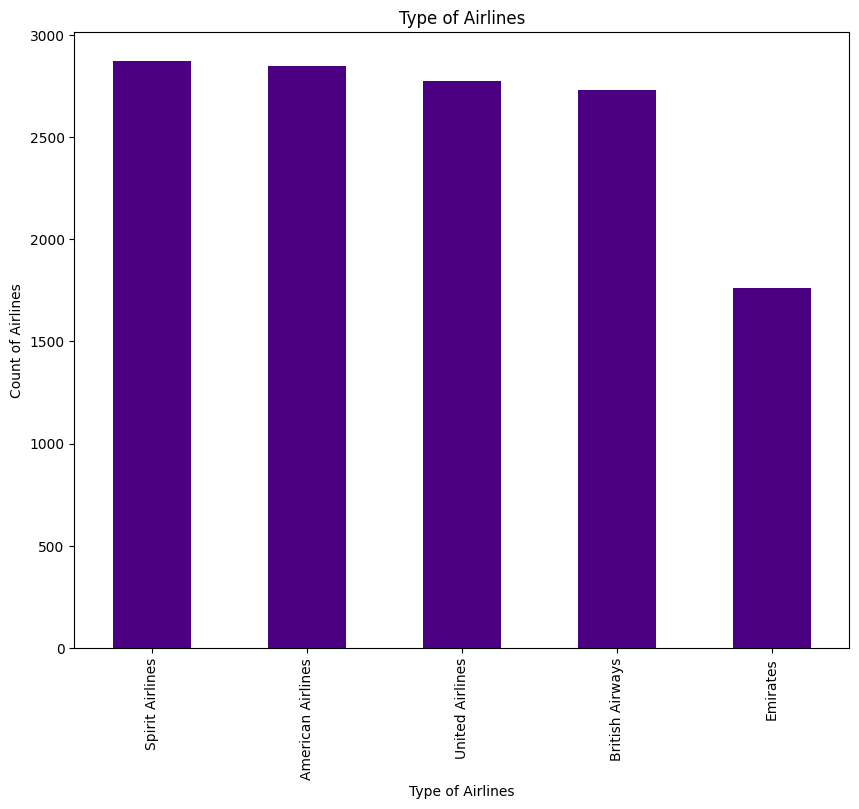

In [ ]:
plt.figure(figsize = (10,8))
airline_data['airline'].value_counts()[0:5].plot(kind = 'bar',color = 'indigo')
plt.title("Type of Airlines")
plt.xlabel("Type of Airlines")
plt.ylabel("Count of Airlines")
plt.show()

Spirit airlines has been preffered the highest, Because it has highest number of passengers travelled followed by American Airlines.

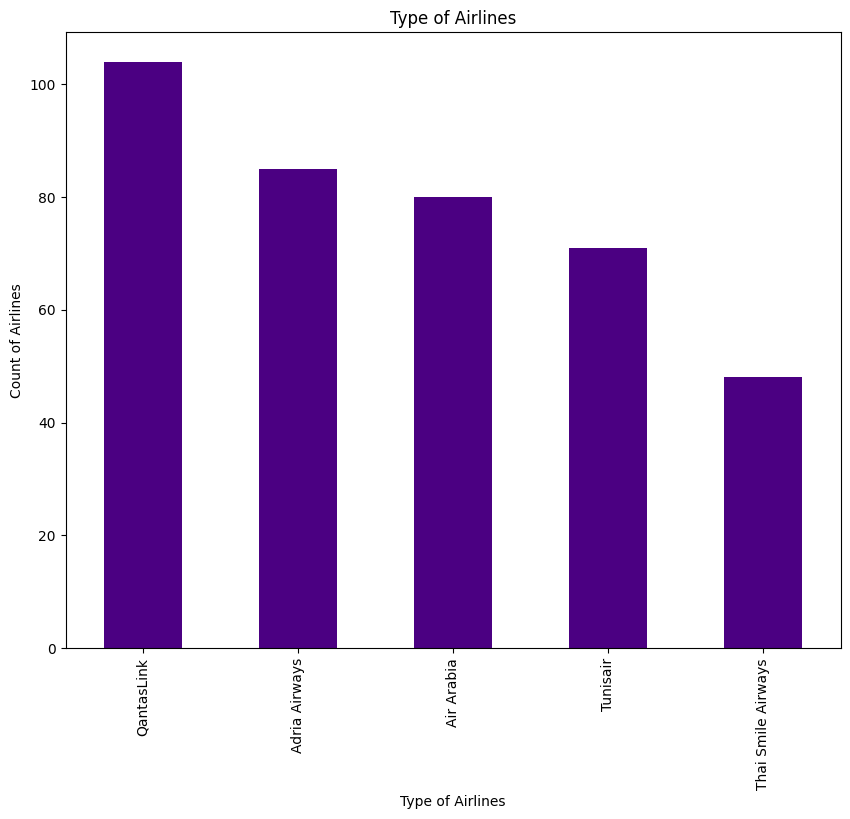

In [ ]:
plt.figure(figsize = (10,8))
airline_data['airline'].value_counts().tail(5).plot(kind = 'bar',color = 'indigo')
plt.title("Type of Airlines")
plt.xlabel("Type of Airlines")
plt.ylabel("Count of Airlines")
plt.show()

Thai Smile Airways airlines has been preffered the least, Because it has least number of passengers travelled followed by Tunisair Airlines.

# **5. Most Frequently used and Rarely used Aircrafts**

In [ ]:
aircrafts = airline_data['aircraft'].value_counts()
aircrafts

,count
aircraft,
A320,2130
A380,1109
Boeing 777,1101
Boeing 737-800,1021
A330,974
Boeing 787,833
Boeing 777-300ER,737
A321,649
Boeing 737,649


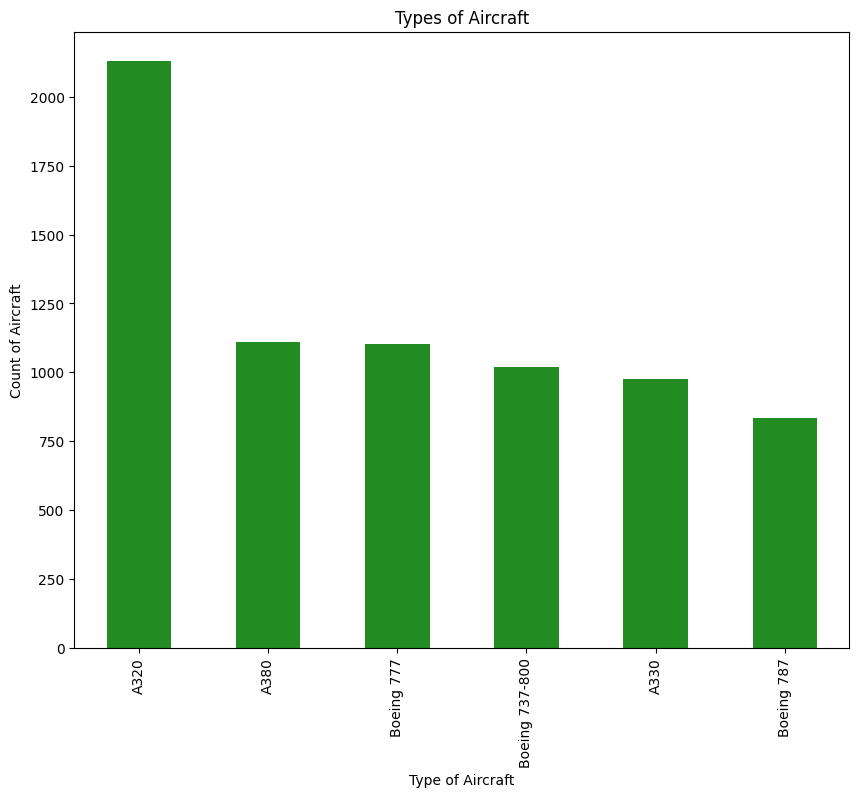

In [ ]:
plt.figure(figsize = (10,8))
airline_data['aircraft'].value_counts()[0:6].plot(kind = 'bar',color = 'forestgreen')
plt.title("Types of Aircraft")
plt.xlabel("Type of Aircraft")
plt.ylabel("Count of Aircraft")
plt.show()

Most frequently used aircraft is A320 followed by A380.

<Axes: xlabel='aircraft'>

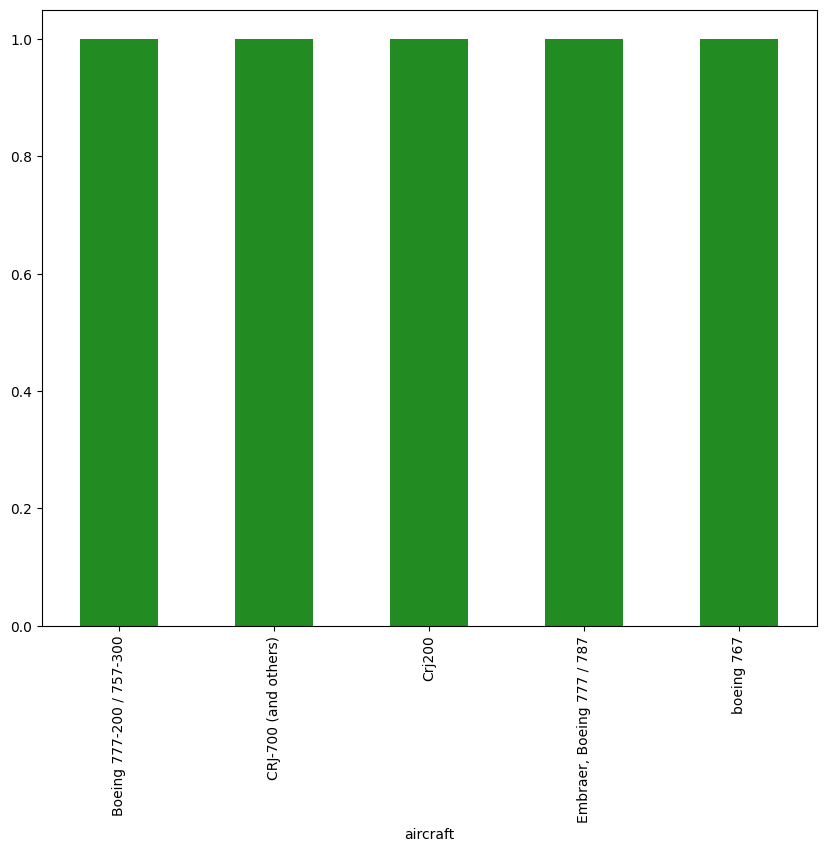

In [ ]:
plt.figure(figsize = (10,8))
airline_data['aircraft'].value_counts().tail(5).plot(kind = 'bar',color = 'forestgreen')

Most rarely used aircraft if Boeing 777-200/757-300 and others.

# 6.Date flown

In [ ]:
airline_data['date_flown'] = airline_data['date_flown'].apply(lambda x: pd.to_datetime(x))

In [ ]:
airline_data['date_flown'].head(10)

,date_flown
1,2019-05-01
3,2019-05-01
5,2019-05-01
7,2019-04-01
9,2019-05-01
11,2019-05-01
13,2019-04-01
15,2019-04-01
17,2019-04-01
19,2019-02-01


In [ ]:
airline_data['Month'] = airline_data['date_flown'].dt.month

In [ ]:
month_wise = airline_data['Month'].value_counts().sort_index(ascending = True)

In [ ]:
month_wise

,count
Month,
1.0,3221
2.0,2553
3.0,2911
4.0,2884
5.0,2638
6.0,3400
7.0,3605
8.0,3535
9.0,3185


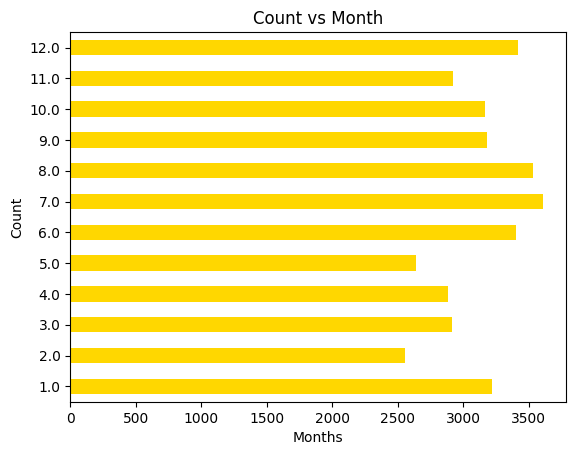

In [ ]:
month_wise.plot(kind = 'barh', color = 'gold')
plt.xlabel("Months")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.title("Count vs Month")
plt.show()

People have travelled more in the month of july compared to all other months followed by june and december. People have travelled the least in the month of feb.

In [ ]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61183 entries, 1 to 131894
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   overall          59401 non-null  float64       
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  seat_comfort     56211 non-null  float64       
 11  cabin_service    56240 non-null  float64       
 12  food_bev         48341 non-null  float64       
 13  entertainment    40230 non-null  float64       
 14  ground_service   37169 non-null  float64  

# **Feature Engineering**

In [ ]:
airline_num = airline_data[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [ ]:
airline_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61183 entries, 1 to 131894
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          59401 non-null  float64
 1   seat_comfort     56211 non-null  float64
 2   cabin_service    56240 non-null  float64
 3   food_bev         48341 non-null  float64
 4   entertainment    40230 non-null  float64
 5   ground_service   37169 non-null  float64
 6   value_for_money  59327 non-null  float64
dtypes: float64(7)
memory usage: 5.7 MB


In [ ]:
airline_data = airline_data.drop(columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [ ]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61183 entries, 1 to 131894
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   author           61183 non-null  object        
 2   review_date      61183 non-null  object        
 3   customer_review  61183 non-null  object        
 4   aircraft         18488 non-null  object        
 5   traveller_type   37540 non-null  object        
 6   cabin            58705 non-null  object        
 7   route            37513 non-null  object        
 8   date_flown       37434 non-null  datetime64[ns]
 9   recommended      59761 non-null  object        
 10  Month            37434 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 7.6+ MB


In [ ]:
airline_data = pd.concat([airline_data.reset_index(), airline_num.reset_index()], axis = 1)

In [ ]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            61183 non-null  int64         
 1   airline          61183 non-null  object        
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  recommended      59761 non-null  object        
 11  Month            37434 non-null  float64       
 12  index            61183 non-null  int64         
 13  overall          59401 non-null  float64       
 14  seat_comfort     56211 non-null  float

In [ ]:
airline_data = airline_data.select_dtypes(['object','float64'])

In [ ]:
airline_data = round(airline_data)

In [ ]:
airline_data.tail()

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,recommended,Month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
61178,Ukraine International,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61179,Ukraine International,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61180,Ukraine International,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61181,Ukraine International,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61182,Ukraine International,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
airline_data['recommended'].replace({'yes':1,"no":0}, inplace = True)

In [ ]:
corr = airline_data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap ='viridis', annot = True, fmt = ".4f")

ValueError: could not convert string to float: 'Turkish Airlines'

It is evident from the correlation map that the overall recommendation has nearest value to 1 that is 0.894 which means it is good.

# **Different features present in the dataset**

In [ ]:
features_column = airline_data.columns

In [ ]:
features_column

# Removing object datatypes.

In [ ]:
new_feature = features_column.drop(['airline', 'author', 'review_date', 'customer_review', 'aircraft','route', 'recommended'])

In [ ]:
new_feature

# Different features and their use cases

# **Conclusion:**

We can conclude the above observations as follows,

* In traveller type, It is evident that people have given both 0 and 1 which we can take it as positive and negative recommendation to interpret to this to family type. positive recommendation given may be due to low price and negative recommendation may be due to lack of proper services and infrastructure.But this is just and assumption from the data we have received.

*  In cabin type, It is evident that more passengers prefer Economy class cabin type out of which many of them have given negative recommendation due to lack of proper infrastructure and services and positive recommendation may be due to low prices and offers. It is also noticed that business class has highest positive recommendation which might be due to better service and infrastructure and negative recommendation due to high price.

*  From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.

*  From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.

*  In seat comfort, It is evident that people have iven more more positive recommendation to seat 5 and least negative recommendation to the same. and seat1 has received the highest negative recommendation which is a matter of concern and has to be checked upon immediately.

*  In cabin service rating people has given highest recommendation rating to cabin service rating 5 as compared to its other counterparts, It is evident that the cabin service is performing good.

*  In Food and Bev department, It is evident that highest negative recommendation has been given to rating 1 which is a matter of concern and the department has to improve the quality of food and services.

*  In Entertainment, It is evident that highest negative recommendation has been given to rating 1 which is a matter of concern and the department has to improve the their entertainment system.



*  In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows that airline has to improve their ground service.

*  In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows that airline has to make their flight service more cost effective.



In [ ]:
for feature in new_feature:
  print(feature)
  airline_data.groupby([feature])['recommended'].value_counts().unstack().plot(kind = 'area', figsize =(12,8))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()

In [ ]:
for feature in new_feature:
  print(feature)
  airline_data.groupby([feature])['recommended'].value_counts().unstack().plot(kind = 'bar', figsize = (12,10))
  plt.title(f"How recommendation varies with {feature} graph")
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.show()

# **CONCLUSION**

•	In Traveller type, It is evident that both the recommendation trend increases from business to couple leisure and decreases to family then again increases high in solo leisure. Which indicate people prefer solo leisure more than any of the other travel type.

•	In Cabin type, It is evident that both the recommendation trend increases from business to Economy class and decreases to First class then again increases slightly in Premium class. Which suggest most people travel in economy class.

•	In month it is not clearly evident that we cannot see any preferable trend but here we can conclude people tent to travel highest during the month of July followed by June and December.

•	In overall rating we can experience a very good insights which is also regular. We can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases.

•	In seat comfort, It is evident that   positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in seat comfort rating 3.0 where we can see similar positive and negative recommendation.

•	In cabin service, It is evident that   as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in cabin service rating 3.5 where we can see similar positive and negative recommendation.

•	In food service, It is evident that as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in food service rating close to 3.0 where we can see similar positive and negative recommendation.

•	In Entertainment service, It is evident that as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Entertainment service rating between 2.5 and 3.0 where we can see similar positive and negative recommendation.

•	In Ground service also, It is evident that as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Ground service rating close 3.0 where we can see similar positive and negative recommendation.

•	Finally in Value for money rating we observe that  as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Value for money rating greater than 3.0 where we can see similar positive and negative recommendation.

airline_data.isna().sum()

We can see there are null values still in the dataset

Removing features which are not important..

In [ ]:
airline_data.drop(['author','aircraft','review_date','route','Month'],axis=1,inplace=True)

In [ ]:
airline_data.info()

In [ ]:
airline_data = airline_data[airline_data['recommended'].notna()]

In [ ]:
airline_data.info()

# **Natural language Processing**

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
def sentiment_scores(sentence):


  side_object = SentimentIntensityAnalyzer()

  sentiment_dict = side_object.polarity_scores(sentence)

  return sentiment_dict['compound']

In [ ]:
airline_data['numeric_review']= airline_data['customer_review'].apply(sentiment_scores)

<ipython-input-86-87bae5068e28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data['numeric_review']= airline_data['customer_review'].apply(sentiment_scores)


In [ ]:
airline_data[['customer_review','numeric_review']].head(10)

,customer_review,numeric_review
0,âœ… Trip Verified | London to Izmir via Istanb...,0.9386
1,âœ… Trip Verified | Istanbul to Bucharest. We ...,0.2732
2,âœ… Trip Verified | Rome to Prishtina via Ista...,-0.9192
3,âœ… Trip Verified | Flew on Turkish Airlines I...,0.9718
4,âœ… Trip Verified | Mumbai to Dublin via Istan...,-0.7599
5,âœ… Trip Verified | Istanbul to Budapest via D...,-0.3400
6,"âœ… Trip Verified | Istanbul to Algiers, plann...",-0.9742
7,âœ… Trip Verified | Basel to Cape Town via Ist...,-0.8185
8,Not Verified | Abu Dhabi to Luxembourg via Ist...,0.8836
9,âœ… Trip Verified | The experience with Turkis...,-0.9345


In [ ]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   author           61183 non-null  object 
 2   review_date      61183 non-null  object 
 3   customer_review  61183 non-null  object 
 4   aircraft         18488 non-null  object 
 5   traveller_type   37540 non-null  object 
 6   cabin            58705 non-null  object 
 7   route            37513 non-null  object 
 8   recommended      59761 non-null  float64
 9   Month            37434 non-null  float64
 10  overall          59401 non-null  float64
 11  seat_comfort     56211 non-null  float64
 12  cabin_service    56240 non-null  float64
 13  food_bev         48341 non-null  float64
 14  entertainment    40230 non-null  float64
 15  ground_service   37169 non-null  float64
 16  value_for_money  59327 non-null  float64
dtypes: float64(9

In [ ]:
corr = airline_data.corr()
corr.style.background_gradient(cmap='Spectral')

ValueError: could not convert string to float: 'Turkish Airlines'

In [ ]:
airline_data.drop('customer_review', axis = 1,inplace= True)

In [ ]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   author           61183 non-null  object 
 2   review_date      61183 non-null  object 
 3   aircraft         18488 non-null  object 
 4   traveller_type   37540 non-null  object 
 5   cabin            58705 non-null  object 
 6   route            37513 non-null  object 
 7   recommended      59761 non-null  float64
 8   Month            37434 non-null  float64
 9   overall          59401 non-null  float64
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
dtypes: float64(9), object(7)
memory usage: 7.5+ MB


# **ONE HOT ENCODING**

In [ ]:
categories = ['airline','cabin','traveller_type']

In [ ]:
dummy_values = pd.get_dummies(airline_data, columns = categories, drop_first = False)

In [ ]:
dummy_values.columns

Index(['author', 'review_date', 'aircraft', 'route', 'recommended', 'Month',
       'overall', 'seat_comfort', 'cabin_service', 'food_bev',
       ...
       'airline_easyJet', 'airline_flydubai', 'cabin_Business Class',
       'cabin_Economy Class', 'cabin_First Class', 'cabin_Premium Economy',
       'traveller_type_Business', 'traveller_type_Couple Leisure',
       'traveller_type_Family Leisure', 'traveller_type_Solo Leisure'],
      dtype='object', length=102)

In [ ]:
from sklearn.model_selection import train_test_split

X = dummy_values.drop('recommended', axis = 1)

y = dummy_values['recommended']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48946, 101), (12237, 101), (48946,), (12237,))

In [ ]:
column = ['Model','Accuracy','Precision','Recall','f1-score','roc_auc_score']
evaluation_metrics_df =pd.DataFrame(columns = column)

In [ ]:
def evaluation_metrics(model,y_test,pred_value, metric_df):
  metric_df= metric_df.append({'Model': model,
                               'Accuracy':accuracy_score(y_test,pred_value),
                               'Recall':recall_score(y_test,pred_value),
                               'Precision':precision_score(y_test,pred_value),
                               'f1-score':f1_score(y_test,pred_value),
                               'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

In [ ]:
airline_data.isnull().sum()

,0
airline,0
author,0
review_date,0
aircraft,42695
traveller_type,23643
cabin,2478
route,23670
recommended,1422
Month,23749
overall,1782


In [ ]:
log = LogisticRegression(max_iter = 10000)
log.fit(X_train,y_train)
score= log.score(X_test,y_test)
print(f"Logistic Regression score : {score}")

ValueError: could not convert string to float: 'Clive Drake'

In [ ]:
pred_value = log.predict(X_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels =[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Logistic Regeression')

#calling function to append evaluation metrices
evaluation_metrics_df =evaluation_metrics('Logistic Regression',y_test,pred_value,evaluation_metrics_df)

ValueError: could not convert string to float: 'R Mendonca'

# **DECISON TREE**

In [ ]:
def evaluation_metrics(model,y_test,pred_value, metric_df):
  metric_df= metric_df.append({'Model': model,
                               'Accuracy':accuracy_score(y_test,pred_value),
                               'Recall':recall_score(y_test,pred_value),
                               'Precision':precision_score(y_test,pred_value),
                               'f1-score':f1_score(y_test,pred_value),
                               'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

In [ ]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
score = decision_tree.score(X_test,y_test)
print(f"Decision Tree score : {score}")

In [ ]:
#model evaluation

pred_value = decision_tree.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels = [1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot = True, fmt = ".1f",cmap = 'viridis')
print('Confusion matrix for Decision Tree')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metrics('Decision Tree',y_test,pred_value,evaluation_metrics_df)

# **RANDOM FOREST**

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
score = forest.score(X_test,y_test)
print(f'Random Forest Score : {score}')

In [ ]:
pred_value = forest.predict(X_test)

print(metrics.classification_report(y_test, pred_value))
cm = confusion_matrix(y_test, pred_value, labels = [1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm,annot =True, fmt =".1f",cmap ='icefire')
plt.title('Confusion Matrix for Random Forest')

#evaluation metric
evaluation_metrics_df=evaluation_metrics('Random Forest',y_test,pred_value,evaluation_metrics_df)


# Random Forest with GridSearchCV

In [ ]:
param_dict = {'n_estimators':[50,80,100],
         'max_depth' : [6,8,10,12],
         'min_samples_split' : [10,50,100],
         'min_samples_leaf' : [30,40,50]}

In [ ]:
forest_grid = GridSearchCV(estimator=forest,
                       param_grid = param_dict,
                       cv =5, verbose=2)

forest_grid.fit(X_train,y_train)
forest_grid.best_estimator_

In [ ]:
forest_grid.best_params_

In [ ]:
forest_grid_best = forest_grid.best_estimator_

In [ ]:
pred_value = forest_grid_best.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm,annot =True, fmt =".1f",cmap ='icefire')
plt.title('Confusion Matrix for Random Forest with GridsearchCV')

evaluation_metrics_df=evaluation_metrics('Random Forest with GridSearchCV',y_test,pred_value,evaluation_metrics_df)

# **K_NEAREST-NEIGHBOUR MODEL**

nearest = KNeighborsClassifier()
nearest.fit(X_train,y_train)
score = nearest.score(X_test,y_test)
print(f"K_Nearest Neighbour score is : {score}")

In [ ]:
pred_value = nearest.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm,annot =True, fmt =".1f",cmap ='icefire')
plt.title('Confusion Matrix for K_Nearest Neighbour')

evaluation_metrics_df=evaluation_metrics('K_Nearest Neighbour',y_test,pred_value,evaluation_metrics_df)

# **K_nearest Neighbour Model with GridSearchCV**

In [ ]:
#Hyperparametric tuning to get best estimator for knn

knn_params = {'n_neighbors':np.arange(10,50,2)}
knn_grid=GridSearchCV(nearest,knn_params,cv=5)
knn_grid.fit(X_train, y_train)


In [ ]:
knn_grid.best_estimator_

In [ ]:
#Assigining grid variable
knn_grid_best = knn_grid.best_estimator_

In [ ]:
pred_value = knn_grid_best.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm,annot =True, fmt =".1f",cmap ='icefire')
plt.title('Confusion Matrix for K_Nearest Neighbour score with GridsearchCV')

evaluation_metrics_df=evaluation_metrics('K_Nearest Neighbour score with GridsearchCV',y_test,pred_value,evaluation_metrics_df)

# **XGBOOST**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
score = xgb_model.score(X_test,y_test)
print(f'XGBoost score : {score}')

In [ ]:
#model evaluation
pred_value = xgb_model.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='Spectral')
plt.title('Confusion Matrix for XGBoost')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metrics('XGBoost',y_test,pred_value,evaluation_metrics_df)

# **Support vector Machine**

In [ ]:
support = SVC(kernel = 'linear')
support.fit(X_train,y_train)
score = support.score(X_test,y_test)
print(f"Support Vector Machine score : {score}")

In [ ]:
#model evaluation
pred_value = support.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='Spectral')
plt.title('Confusion Matrix for Support Vector machine')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metrics('Support Vector machine',y_test,pred_value,evaluation_metrics_df)

In [ ]:
#Evaluation matrices of the above models
evaluation_metrics_df

In [ ]:
evaluation_metrics_df.sort_values('Accuracy',ascending=  False)
evaluation_metrics_df = evaluation_metrics_df.reset_index(drop=True)
evaluation_metrics_df

Here the accuracy of Random forest model is higher compared to all other models with a score of 0.957166 and logistic regression and support vector machines have second highest accuracy of 0.956831. The combined score of Precision, Recall and F1-score and ROC_AUC_SCORE is highest in Random forest model hence we will be selecting random forest for further prediction.

# **CONCLUSION**

We can conclude the above observations as follows,

*  In traveller type, It is evident that people have given both 0 and 1 which we can take it as positive and negative recommendation to interpret to this to family type. positive recommendation given may be due to low price and negative recommendation may be due to lack of proper services and infrastructure.But this is just and assumption from the data we have received.

*  In cabin type, It is evident that more passengers prefer Economy class cabin type out of which many of them have given negative recommendation due to lack of proper infrastructure and services and positive recommendation may be due to low prices and offers. It is also noticed that business class has highest positive recommendation which might be due to better service and infrastructure and negative recommendation due to high price.

*  From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.

*  From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.

*   In cabin service rating people has given highest recommendation rating to cabin service rating 5 as compared to its other counterparts, It is evident that the cabin service is performing good.

*  In Food and Bev department, It is evident that highest negative recommendation has been given to rating 1 which is a matter of concern and the department has to improve the quality of food and services.

*  In Entertainment, It is evident that highest negative recommendation has been given to rating 1 which is a matter of concern and the department has to improve the their entertainment system.

*  In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows that airline has to improve their ground service.


*  In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows that airline has to make their flight service more cost effective.

*  Here the accuracy of Random forest model is higher compared to all other models with a score of 0.957166 and logistic regression and support vector machines have second highest accuracy of 0.956831. The combined score of Precision, Recall and F1-score and ROC_AUC_SCORE is highest in Random forest model hence we will be selecting random forest for further prediction.
